En este documento realizamos un análisis detallado de los ingresos presupuestarios percibidos en Brasil entre 2013 y 2021. Analizaremos los ingresos por categoría económica, por órgano administrativo y temporalmente.

`Importante`

Dentro del análisis tendremos que tener en cuenta que el valor registrado (valor lancado) y el valor recaudado (valor realizado) deberían ser iguales, ya que lo que se registra contablemente debe ser igual a lo que se recibe finalmente contablemente. En caso de que se produzcan diferencias entre ambos valores para cada entrada, será necesario observar las razones por las cuales se produce esta casuística. 

Indicamos a continuación el significado de las columnas que contienen valores de ingresos:

- Previsión del ingreso (valor previsto atualizado): previsión del ingreso a recaudar
- Ingreso registrado (valor lancado): valor del ingreso registrado "contablemente".
- Ingreso recaudado (valor realizado): valor del ingreso recaudado finalmente. 
- Importe recaudado sobre la previsión (percentual realizado): porcentaje de la previsión recaudado finalmente. 

In [1]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
from src import funciones_soporte as fs

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
datos_brasil = pd.read_pickle("datos/datos_brasil.pkl")
print(datos_brasil.shape)
datos_brasil.head(1)

(1026299, 16)


,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,CATEGORIA ECONÔMICA,ORIGEM RECEITA,ESPÉCIE RECEITA,DETALHAMENTO,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,PERCENTUAL REALIZADO,DATA LANÇAMENTO,ANO EXERCÍCIO
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIVIDA ATIVA NAO TRIBUTARIA DE OUTRAS REC,0.0,0.0,1297.13,0.0,2013-12-31,2013


## *Evolución temporal*

En este apartado nos encontraremos con un análisis temporal de los ingresos. Revisaremos las diferencias entre los valores previstos y los recaudados finalmente, así como entre los ingresos registrados y los recaudados realmente. 

### *Previsiones y recaudacion*

In [4]:
# Filtramos el dataframe para quedarnos solo con las columnas de fecha de registro del ingreso y los valores de ingresos.
df_comp_recaudacion_prevision = datos_brasil.iloc[: ,[10, 12, 14]]
df_comp_recaudacion_prevision["Año"] = df_comp_recaudacion_prevision["DATA LANÇAMENTO"].dt.strftime("%Y")
df_comp_recaudacion_prevision

C:\Users\gabri\AppData\Local\Temp\ipykernel_9172\2635946192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_recaudacion_prevision["Año"] = df_comp_recaudacion_prevision["DATA LANÇAMENTO"].dt.strftime("%Y")


,VALOR PREVISTO ATUALIZADO,VALOR REALIZADO,DATA LANÇAMENTO,Año
0,0.00,"1,297.13",2013-12-31,2013
1,0.00,"26,666,621.42",2013-12-31,2013
2,0.00,"301,251.13",2013-12-31,2013
3,0.00,"1,855.58",2013-12-31,2013
4,0.00,"52,140.68",2013-12-31,2013
...,...,...,...,...
1026294,"16,940,891.00",0.00,2021-04-23,2021
1026295,0.00,372.90,2021-11-22,2021
1026296,"200,000.00",0.00,2021-04-23,2021
1026297,0.00,"1,000,000.00",2021-05-10,2021


In [5]:
df_agrupado = df_comp_recaudacion_prevision.groupby("Año")[["VALOR PREVISTO ATUALIZADO","VALOR REALIZADO"]].sum()
df_agrupado["porcentaje_recaudacion"] = round((df_agrupado["VALOR REALIZADO"]/df_agrupado["VALOR PREVISTO ATUALIZADO"]) *100, 2)
df_agrupado

,VALOR PREVISTO ATUALIZADO,VALOR REALIZADO,porcentaje_recaudacion
Año,,,
2013,"2,174,650,946,322.04","1,893,613,719,099.78",87.08
2014,"2,392,129,226,119.23","2,238,551,079,327.88",93.58
2015,"2,878,827,555,613.92","2,665,685,375,159.13",92.60
2016,"2,952,696,248,075.54","2,839,711,583,462.82",96.17
2017,"3,414,379,614,681.84","2,558,047,412,866.96",74.92
2018,"3,505,648,331,810.28","2,942,387,872,873.97",83.93
2019,"3,261,378,698,948.11","2,991,564,738,258.26",91.73
2020,"3,577,146,718,910.25","3,631,448,629,524.17",101.52
2021,"4,180,716,471,387.52","3,876,372,024,873.04",92.72


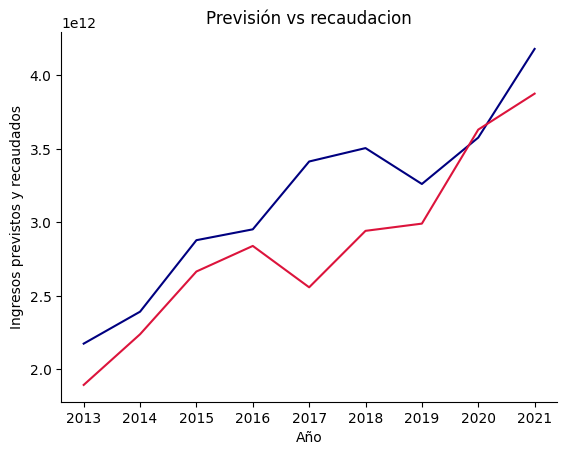

In [6]:
fs.evolucion_temporal(df_agrupado, "Año", ["VALOR PREVISTO ATUALIZADO", "VALOR REALIZADO"])

Como podemos ver en ambos gráficos tanto la previsión, como la recaudación real de los ingresos públicos de Brasil presentan una tendencia al alza a lo largo de los años. Aún así observamos que la recaudación anual presenta valores inferiores en todos los años a la previsión recaudada. Principalmente vemos una importante reducción en la recaudación anual en 2017, año en el cual se esperaba ingresar un total de 3.414.379.614.681,84 $, de los cuales se ingresaron solo un 74,92 %. Esto puede deberse a la crisis económica que sufrió el país entre 2015 y 2016. 

### *Ingresos registrados e ingresos recaudados*

In [33]:
# Filtramos el dataframe para quedarnos solo con las columnas de fecha de registro del ingreso y los valores de ingresos.
df_comp_recaudacion_registro = datos_brasil.iloc[: ,[11, 12, 14]]
df_comp_recaudacion_registro["Año"] = df_comp_recaudacion_registro["DATA LANÇAMENTO"].dt.strftime("%Y")
df_comp_recaudacion_registro

C:\Users\gabri\AppData\Local\Temp\ipykernel_17084\2262978967.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_recaudacion_registro["Año"] = df_comp_recaudacion_registro["DATA LANÇAMENTO"].dt.strftime("%Y")


,VALOR LANÇADO,VALOR REALIZADO,DATA LANÇAMENTO,Año
0,0.00,"1,297.13",2013-12-31,2013
1,0.00,"26,666,621.42",2013-12-31,2013
2,0.00,"301,251.13",2013-12-31,2013
3,0.00,"1,855.58",2013-12-31,2013
4,0.00,"52,140.68",2013-12-31,2013
...,...,...,...,...
1026294,0.00,0.00,2021-04-23,2021
1026295,0.00,372.90,2021-11-22,2021
1026296,0.00,0.00,2021-04-23,2021
1026297,0.00,"1,000,000.00",2021-05-10,2021


In [8]:
df_agrupado2 = df_comp_recaudacion_registro.groupby("Año")[["VALOR LANÇADO","VALOR REALIZADO"]].sum()
df_agrupado2["diferencia recaudacion"] = df_agrupado2["VALOR LANÇADO"] - df_agrupado2["VALOR REALIZADO"]
df_agrupado2

,VALOR LANÇADO,VALOR REALIZADO,diferencia recaudacion
Año,,,
2013,"1,142,556,841,623.94","1,893,613,719,099.78","-751,056,877,475.84"
2014,"1,266,561,021,071.51","2,238,551,079,327.88","-971,990,058,256.37"
2015,"307,296,621,471.69","2,665,685,375,159.13","-2,358,388,753,687.44"
2016,"18,651,606,918.55","2,839,711,583,462.82","-2,821,059,976,544.27"
2017,"133,949,259,691.54","2,558,047,412,866.96","-2,424,098,153,175.42"
2018,"8,523,696,496.37","2,942,387,872,873.97","-2,933,864,176,377.60"
2019,"-124,684,806,683.59","2,991,564,738,258.26","-3,116,249,544,941.85"
2020,"35,589,145,007.15","3,631,448,629,524.17","-3,595,859,484,517.02"
2021,"-6,336,662,253.18","3,876,372,024,873.04","-3,882,708,687,126.22"


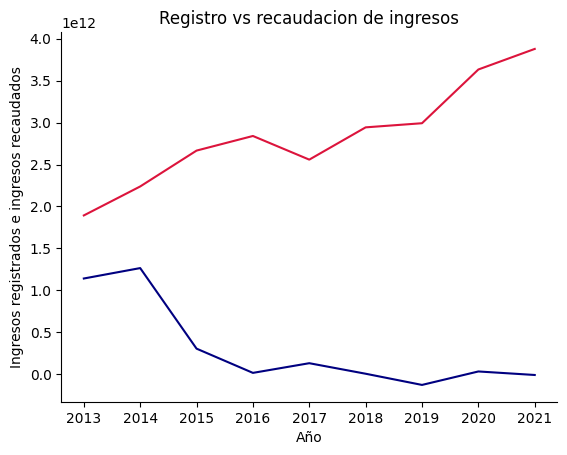

In [9]:
fs.evolucion_temporal(df_agrupado2, "Año", ["VALOR LANÇADO", "VALOR REALIZADO"])

En cuanto a los registros de ingresos, y la recaudación real observamos enormes diferencias. Como hemos comentado anteriormente, el registro de un ingreso contable debe ser igual al ingreso final recibido por la entidad recaudadora. En este caso no se cumple este principio. Vemos que durante todo el período analizado el resgitro de ingresos presenta una tendencia a la baja, mientras que los ingresos realmente recaudados presentan una tendencia al alza. Se están registrando menos ingresos de los que se están recuadando realmente. Más abajo observaremos qué entidades administrativas presentan mayores diferencias en este aspecto, ya que intuimos la existencia de fraude públiico.

## *Ingresos por categoría económica*

Como hemos visto anteriormente los ingresos de Brasil entre 2013 y 2021 se clasifican en diferentes categorías y subcategorías económicas. A continuación realizaremos un análisis de los ingresos recibidos por categoría y después de las subcategorías que contienen las categorías principales. 

Las categorías económicas principales en las que se dividen los ingresos de Brasil son:
- Ingresos corrientes
- Ingresos de capital
- Ingresos corrientes - intrapresupuestarios	
- Ingresos de capital - intrapresupuestarios

Vamos a ir viendo el desglose de los ingresos por categoría ecoómica.

In [4]:
# Ingresos por categoría económica general
categorias_economicas = fs.info_cat(datos_brasil, "CATEGORIA ECONÔMICA").reset_index()
categorias_economicas

,CATEGORIA ECONÔMICA,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
0,Receitas Correntes,"13,549,526,943,206.14","5,377,870,503,243.72","12,909,343,128,909.43",95.28,"7,531,472,625,665.71"
1,Receitas Correntes - intra-orçamentárias,"291,485,025,919.00",0.00,"292,651,790,699.89",100.40,"292,651,790,699.89"
2,Receitas de Capital,"14,485,753,431,206.59","3,813,949.42","12,407,136,680,065.79",85.65,"12,407,132,866,116.37"
3,Receitas de Capital - intra-orçamentárias,"10,808,411,537.00",0.00,"28,250,835,724.33",261.38,"28,250,835,724.33"
4,Sem informação,0.00,"2,812,347,576.39",46.57,Previsión de 0,"-2,812,347,529.82"


Al adentrarnos en las categorías económicas podemos observar diferencias entre los diferentes valores de ingresos. La categoría que más ingresos ha recaudado entre 2013 y 2021 ha sido la de ingresos de capital, seguida por los ingresos corrientes. Estas categorías contienen al fin y al cabo la mayoría de los ingresos presupuestarios. Los ingresos intrapresupuestarios tienen una inferior recaudación. Finalmente tenemos las entradas sin información. 

En cuanto a las previsiones, las categorías con mayor volumen de previsión son asimismo las de inrgesos corriente y de capital, seguidas de los ingresos intrapresupuestarios. De las previsiones, las categorías que han llegado a recaudar la totalidad o más de lo previsto han sido las intrapresupuestarias. Los ingresos corriente y de capital han consguido entre un 80% y un 90% de la recaudación prevista. 

Finalmente, las categorías con más diferencia entre los ingresos registrados y los ingresos recaudados son las intrapresupuestarias, las cuales tienen un ingreso registrado de 0 $. Los ingresos de capital presentan una alta diferencia asimismo, ya que hay un registro bastante pequeño de estos ingresos. Los ingresos corrientes son los que menos diferencia presentan.

In [16]:
cat_ec2 =categorias_economicas[categorias_economicas["CATEGORIA ECONÔMICA"] != "Sem informação"]

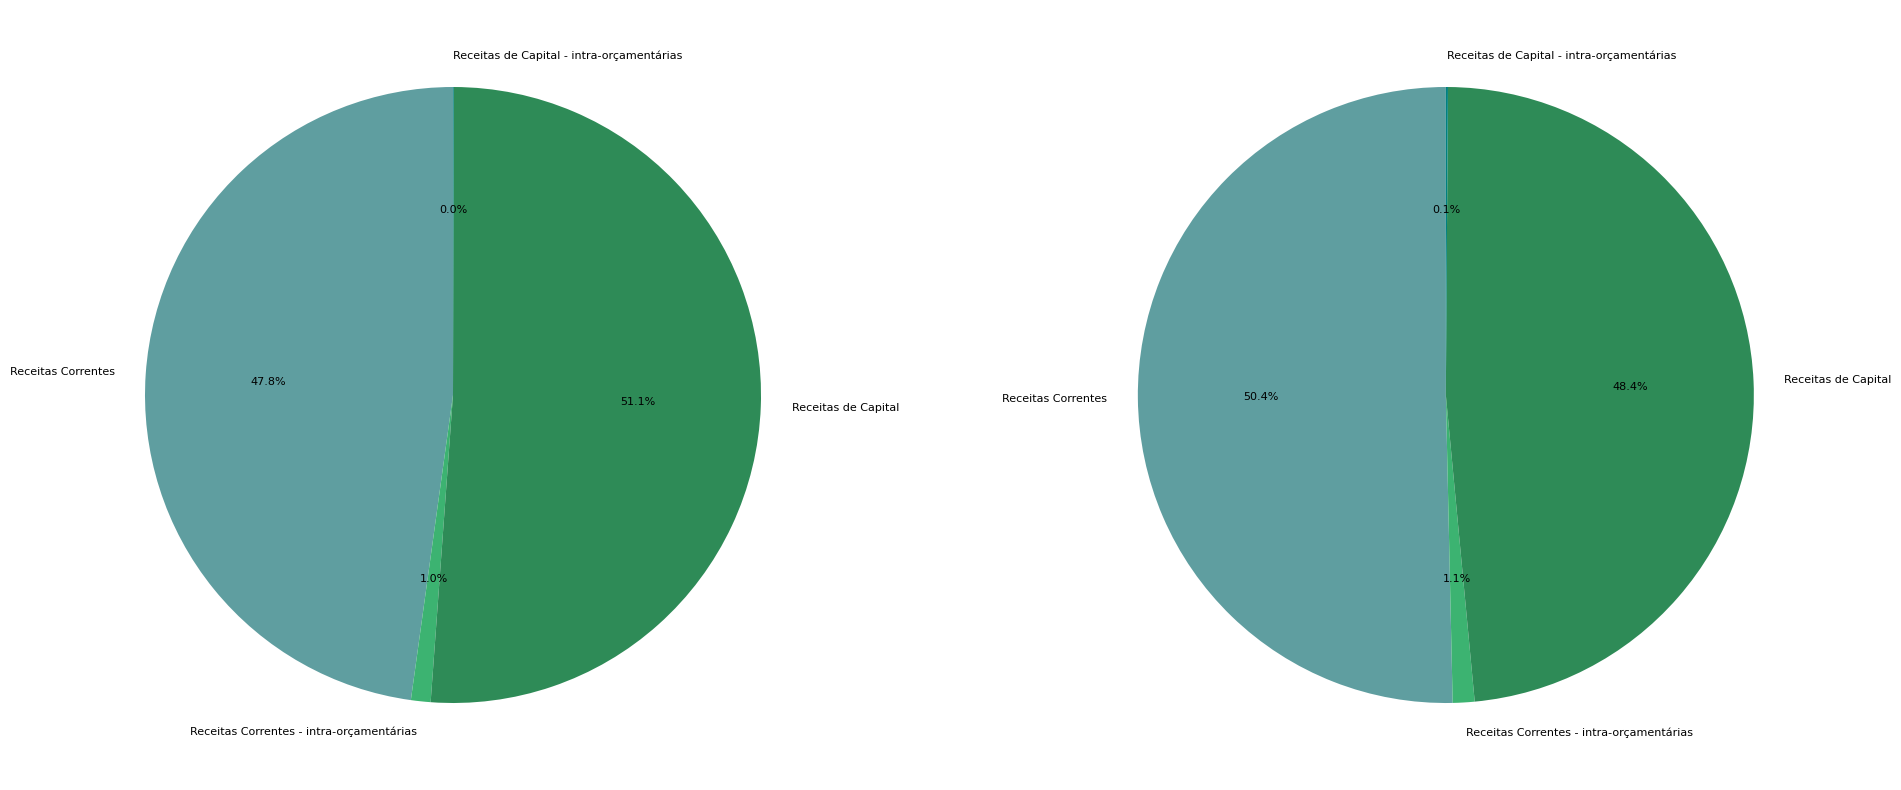

In [47]:
colores_categorias = ["cadetblue", "mediumseagreen", "seagreen", "teal", "turquoise"]

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 8), sharex = True)

axes[0].pie("VALOR PREVISTO ATUALIZADO", 
        labels = "CATEGORIA ECONÔMICA",
        data = cat_ec2, 
        autopct=  '%1.1f%%', 
        colors = colores_categorias, 
        textprops={'fontsize': 8}, 
        startangle=90,
        )

axes[1].pie("VALOR REALIZADO", 
        labels = "CATEGORIA ECONÔMICA",
        data = cat_ec2, 
        autopct=  '%1.1f%%', 
        colors = colores_categorias, 
        textprops={'fontsize': 8}, 
        startangle=90,
        )
plt.tight_layout()

A continuación podemos ver de forma detallada, como en un balance, las partidas correspondientes a cada categoría económica.

In [18]:
ingresos_cat = datos_brasil.groupby(["CATEGORIA ECONÔMICA", "ORIGEM RECEITA"])[["VALOR PREVISTO ATUALIZADO", "VALOR LANÇADO","VALOR REALIZADO"]].sum().round(2)
ingresos_cat

VALOR PREVISTO ATUALIZADO  \
CATEGORIA ECONÔMICA                       ORIGEM RECEITA                                                           
Receitas Correntes                        Contribuições                                     7,224,633,087,504.00   
                                          Impostos, Taxas e Contribuições de Melhoria       4,510,202,085,939.00   
                                          Outras Receitas Correntes                           428,858,259,677.00   
                                          Receita Agropecuária                                    230,056,327.00   
                                          Receita Industrial                                   18,734,738,626.00   
                                          Receita Patrimonial                                 922,303,174,656.03   
                                          Receita de Serviços                                 439,803,742,964.11   
                                          Receitas Correntes - a classificar                                0.00   
                                          Transferências Correntes                              4,761,797,513.00   
Receitas Correntes - intra-orçamentárias  Contribuições                                       190,615,572,904.00   
                                          Impostos, Taxas e Contribuições de Melhoria               8,679,239.00   
                                          Outras Receitas Correntes                            98,478,861,468.00   
                                          Receita Industrial                                    1,381,739,049.00   
                                          Receita Patrimonial                                      45,380,166.00   
                                          Receita de Serviços                                     954,793,093.00   
Receitas de Capital                       Alienação de Bens                                    69,459,904,322.00   
                                          Amortizações de Empréstimos                         468,392,937,016.00   
                                          Operações de Crédito                             12,776,862,878,819.19   
                                          Outras Receitas de Capital                        1,169,948,076,486.00   
                                          Transferências de Capital                             1,089,634,563.40   
Receitas de Capital - intra-orçamentárias Alienação de Bens                                                 0.00   
                                          Operações de Crédito                                 10,808,411,537.00   
Sem informação                            Sem informação                                                    0.00   

                                                                                             VALOR LANÇADO  \
CATEGORIA ECONÔMICA                       ORIGEM RECEITA                                                     
Receitas Correntes                        Contribuições                               3,220,620,507,720.18   
                                          Impostos, Taxas e Contribuições de Melhoria 2,020,808,903,486.62   
                                          Outras Receitas Correntes                     136,055,962,948.35   
                                          Receita Agropecuária                                        0.00   
                                          Receita Industrial                                          0.00   
                                          Receita Patrimonial                               380,086,767.00   
                                          Receita de Serviços                                         0.00   
                                          Receitas Correntes - a classificar                  5,042,321.57   
                                          Transferências Correntes                    

Realizaremos un análisis en detalle de los origenes de los ingresos dentro de cada categoría económica.

### *Ingresos corrientes*

Como hemos visto en la preview del balance anterior, los ingresos corrientes se componen de los siguientes orígenes:

In [28]:
# Ingresos corrientes
ingresos_corrientes2 = datos_brasil[datos_brasil["CATEGORIA ECONÔMICA"] == "Receitas Correntes"]
ingresos_corrientes_origen = fs.info_cat(ingresos_corrientes2, "ORIGEM RECEITA").reset_index()
ingresos_corrientes_origen

,ORIGEM RECEITA,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
0,Contribuições,"7,224,633,087,504.00","3,220,620,507,720.18","6,877,089,890,534.66",95.19,"3,656,469,382,814.48"
1,"Impostos, Taxas e Contribuições de Melhoria","4,510,202,085,939.00","2,020,808,903,486.62","4,287,304,858,124.57",95.06,"2,266,495,954,637.95"
2,Outras Receitas Correntes,"428,858,259,677.00","136,055,962,948.35","371,983,192,854.63",86.74,"235,927,229,906.28"
3,Receita Agropecuária,"230,056,327.00",0.00,"212,916,430.85",92.55,"212,916,430.85"
4,Receita Industrial,"18,734,738,626.00",0.00,"17,941,345,587.65",95.77,"17,941,345,587.65"
5,Receita Patrimonial,"922,303,174,656.03","380,086,767.00","957,242,133,633.19",103.79,"956,862,046,866.19"
6,Receita de Serviços,"439,803,742,964.11",0.00,"409,260,662,661.21",93.06,"409,260,662,661.21"
7,Receitas Correntes - a classificar,0.00,"5,042,321.57","-15,471,989,712.32",Previsión de 0,"-15,477,032,033.89"
8,Transferências Correntes,"4,761,797,513.00",0.00,"3,780,118,794.99",79.38,"3,780,118,794.99"


Dentro de los ingresos corrientes nos encontramos que la principal fuente de estos ingresos son las contribuciones y los ingresos fiscales, los cuales se componen por los impuestos, tasas y contribuciones de mejoría. Estas dos categorías son asimismo las que han recibido una mayor previsión de ingresos. Al fin y al cabo se componen de los ingresos procedentes de la recudación de impuestos, tasa y contribuciones, así como de las contribuciones sociales. Estos son los principales ingresos de una economía por norma general. Como es de esperar, la mayor diferencia entre lo recaudado y lo registrado es superior en estas categorías. 

Los orígenes con menor volumen de ingresos son las rentas agrarias, las cuales proceden de la actividad o explotación agraria de origen vegetal o animal.La previsión de estsos ingresos es bastante baja asimismo. 

Nos encontramos que hay un registro nulo en las rentas agropecuarias, las rentas industriales, y las rentas de servicios. 

<Axes: xlabel='diferencia_recaudacion', ylabel='ORIGEM RECEITA'>

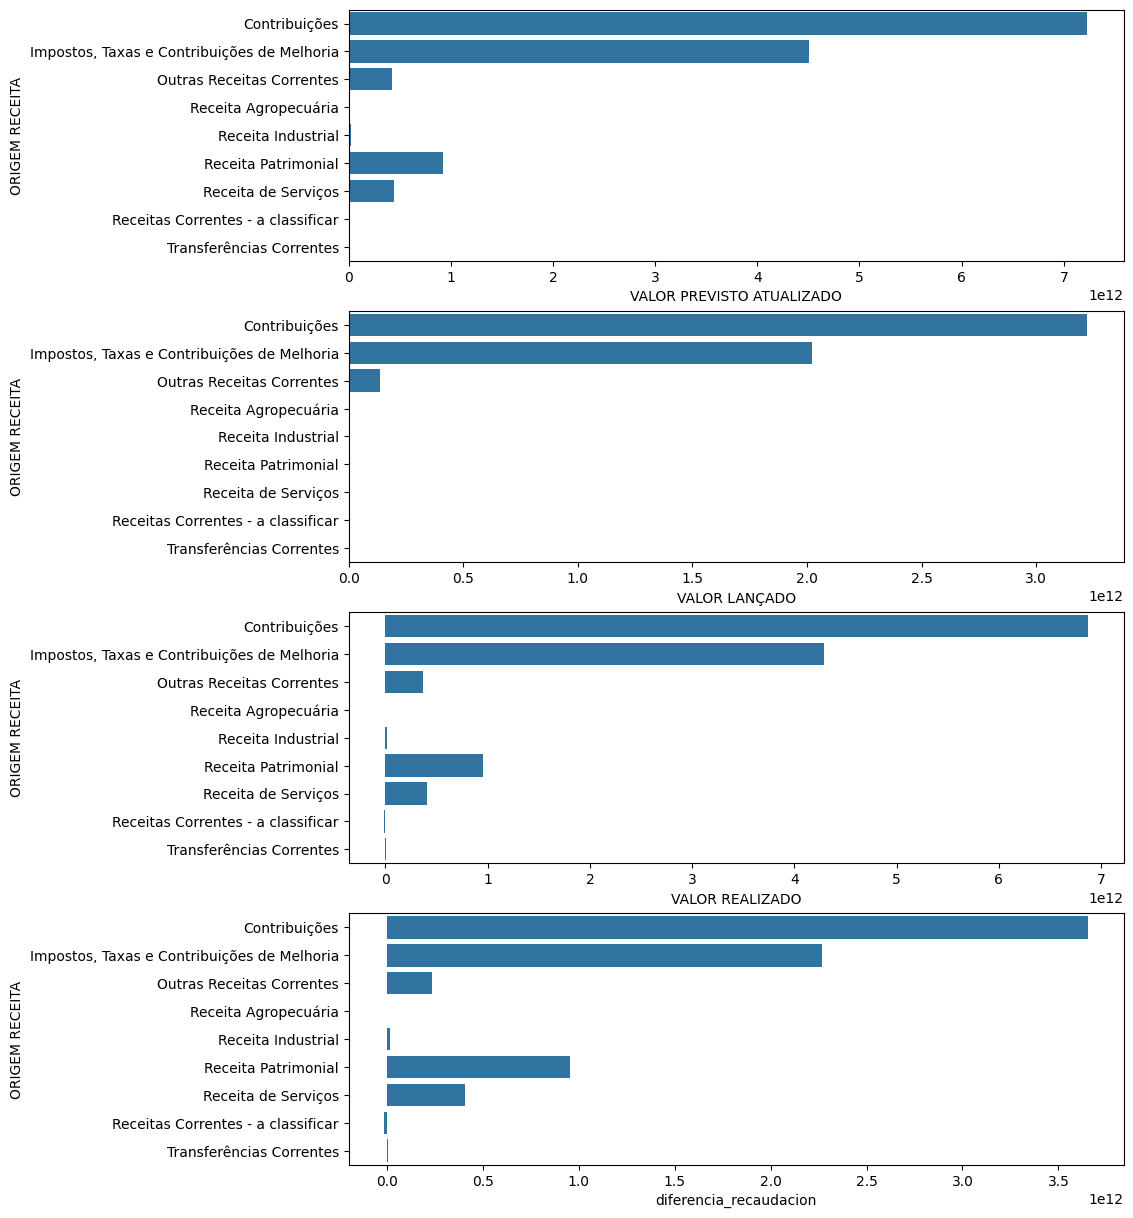

In [53]:
fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (10, 15))
sns.barplot(y = "ORIGEM RECEITA", 
            x = "VALOR PREVISTO ATUALIZADO",
            data = ingresos_corrientes_origen,
            ax = axes[0])
sns.barplot(y = "ORIGEM RECEITA", 
            x = "VALOR LANÇADO",
            data = ingresos_corrientes_origen,
            ax = axes[1])
sns.barplot(y = "ORIGEM RECEITA", 
            x = "VALOR REALIZADO",
            data = ingresos_corrientes_origen,
            ax = axes[2]) 
sns.barplot(y = "ORIGEM RECEITA", 
            x = "diferencia_recaudacion",
            data = ingresos_corrientes_origen,
            ax = axes[3]) 

In [21]:
# Nos metemos en las contribuciones
ingresos_corrientes = datos_brasil[datos_brasil["ORIGEM RECEITA"] == "Contribuições"]
fs.info_cat(ingresos_corrientes, "ESPÉCIE RECEITA")

,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
ESPÉCIE RECEITA,,,,,
Contribuições econômicas,"128,465,554,111.00","31,469,943,756.64","137,391,936,282.17",106.95,"105,921,992,525.53"
Contribuições para Entidades Privadas de Serv,0.00,"7,236,634,754.58",0.00,Previsión de 0,"-7,236,634,754.58"
Contribuições sociais,"7,286,783,106,297.00","3,181,913,929,208.96","6,906,212,225,604.08",94.78,"3,724,298,296,395.12"


In [23]:
# dentro de las contibuciones nos metemos en las contribuciones económicas
ingresos_corrientes = datos_brasil[datos_brasil["ESPÉCIE RECEITA"] == "Contribuições econômicas"]
ingresos_corrientes_detalle = fs.info_cat(ingresos_corrientes, "DETALHAMENTO").reset_index()
ingresos_corrientes_detalle[ingresos_corrientes_detalle["VALOR LANÇADO"] == 0]

,DETALHAMENTO,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
1,CIDE-COMBUST.-COMERCIALIZACAO-DIV.AT-MUL.JUR.,"513,811,274.00",0.00,"2,329,775.85",0.45,"2,329,775.85"
2,CIDE-COMBUST.-COMERCIALIZACAO-JUROS DIV.ATIVA,"1,413,413.00",0.00,"2,628,207.83",185.95,"2,628,207.83"
3,CIDE-COMBUST.-COMERCIALIZACAO-JUROS DÍV.ATIVA,"5,388,140.00",0.00,"7,843,346.52",145.57,"7,843,346.52"
4,CIDE-COMBUST.-COMERCIALIZACAO-MULTAS DIV.AT.,"160,568.00",0.00,"1,801,894.52","1,122.20","1,801,894.52"
5,CIDE-COMBUST.-COMERCIALIZACAO-MULTAS DÍV.AT.,"934,976.00",0.00,"642,701.35",68.74,"642,701.35"
...,...,...,...,...,...,...
84,OUTR.CONTR.ECON-ARREC.PROJ.RFB-DIV.AT.MUL/JUR,0.00,0.00,"5,368,073.13",Previsión de 0,"5,368,073.13"
86,OUTRAS CONTRIB.ECONOM.-ARREC.PROJ.RFB-DIV.AT.,0.00,0.00,"614,743.57",Previsión de 0,"614,743.57"
87,OUTRAS CONTRIBUICOES ECONOMICAS,"11,557.00",0.00,0.00,0.00,0.00
90,REC.DIST.AUDIOVISUAIS POR PRESTADOR DE SERV.,"3,255,714,287.00",0.00,"2,717,246,488.53",83.46,"2,717,246,488.53"


#### *Ingresos corrientes - intrapresupuestarios*

In [33]:
ingresos_corrientes_intrapresupuestarios = datos_brasil[datos_brasil["CATEGORIA ECONÔMICA"] == "Receitas Correntes - intra-orçamentárias"]
fs.info_cat(ingresos_corrientes_intrapresupuestarios, "ORIGEM RECEITA")

,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
ORIGEM RECEITA,,,,,
Contribuições,"190,615,572,904.00",0.00,"166,514,271,351.59",87.36,"166,514,271,351.59"
"Impostos, Taxas e Contribuições de Melhoria","8,679,239.00",0.00,"-12,147,875.22",-139.96,"-12,147,875.22"
Outras Receitas Correntes,"98,478,861,468.00",0.00,"123,592,727,703.21",125.50,"123,592,727,703.21"
Receita Industrial,"1,381,739,049.00",0.00,"1,314,822,119.85",95.16,"1,314,822,119.85"
Receita Patrimonial,"45,380,166.00",0.00,"92,745,808.59",204.38,"92,745,808.59"
Receita de Serviços,"954,793,093.00",0.00,"1,149,371,591.87",120.38,"1,149,371,591.87"


#### *Ingresos de capital*

In [34]:
ingresos_capital = datos_brasil[datos_brasil["CATEGORIA ECONÔMICA"] == "Receitas de Capital"]
fs.info_cat(ingresos_capital, "ORIGEM RECEITA")

,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
ORIGEM RECEITA,,,,,
Alienação de Bens,"69,459,904,322.00",0.00,"26,925,014,385.03",38.76,"26,925,014,385.03"
Amortizações de Empréstimos,"468,392,937,016.00",0.00,"799,034,542,267.89",170.59,"799,034,542,267.89"
Operações de Crédito,"12,776,862,878,819.19","3,813,949.42","9,857,797,506,467.94",77.15,"9,857,793,692,518.52"
Outras Receitas de Capital,"1,169,948,076,486.00",0.00,"1,722,900,919,485.78",147.26,"1,722,900,919,485.78"
Transferências de Capital,"1,089,634,563.40",0.00,"478,697,459.15",43.93,"478,697,459.15"


#### *Ingresos de capital - intrapresupuestarios*

In [35]:
ingresos_capital_intrapresupuestarios = datos_brasil[datos_brasil["CATEGORIA ECONÔMICA"] == "Receitas de Capital - intra-orçamentárias"]
fs.info_cat(ingresos_capital_intrapresupuestarios, "ORIGEM RECEITA")

,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
ORIGEM RECEITA,,,,,
Alienação de Bens,0.00,0.00,"108,886,708.01",Previsión de 0,"108,886,708.01"
Operações de Crédito,"10,808,411,537.00",0.00,"28,141,949,016.32",260.37,"28,141,949,016.32"


In [36]:
ingresos_capital_intrapresupuestarios = datos_brasil[datos_brasil["ORIGEM RECEITA"] == "Alienação de Bens"]
fs.info_cat(ingresos_capital_intrapresupuestarios, "ESPÉCIE RECEITA")

,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
ESPÉCIE RECEITA,,,,,
Alienação de bens imóveis,"37,158,692,141.00",0.00,"1,816,905,074.09",4.89,"1,816,905,074.09"
Alienação de bens intangíveis,"17,119,803,896.00",0.00,"4,041,282,175.35",23.61,"4,041,282,175.35"
Alienação de bens móveis,"15,181,408,285.00",0.00,"21,175,713,843.60",139.48,"21,175,713,843.60"


#### *Entradas sin información*

In [37]:
ingresos_sin_info = datos_brasil[datos_brasil["ORIGEM RECEITA"] == "Sem informação"]
fs.info_cat(ingresos_sin_info, "ESPÉCIE RECEITA")

,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
ESPÉCIE RECEITA,,,,,
Sem informação,0.00,"2,812,347,576.39",46.57,Previsión de 0,"-2,812,347,529.82"


## Análisis por entidad gubernamental

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
# Ingresos por entidad gubernamental
entidad_gub = fs.info_cat(datos_brasil, "NOME ÓRGÃO SUPERIOR").reset_index()
entidad_gub

,NOME ÓRGÃO SUPERIOR,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
0,Advocacia-Geral da União,"3,726,053,651.00",0.00,"334,962,977.49",8.99,"334,962,977.49"
1,Controladoria-Geral da União,"740,692,856.00",0.00,"7,555,037.45",1.02,"7,555,037.45"
2,"Ministério da Agricultura, Pecuária e Abastec","87,492,532,893.00",0.00,"56,433,953,381.26",64.50,"56,433,953,381.26"
3,Ministério da Cidadania,"43,958,882,249.00",0.00,"5,143,388,129.18",11.70,"5,143,388,129.18"
4,"Ministério da Ciência, Tecnologia, Inovações","62,254,372,476.31","79,230.26","34,791,131,893.58",55.89,"34,791,052,663.32"
5,Ministério da Defesa,"198,522,792,044.00",0.00,"104,665,740,965.96",52.72,"104,665,740,965.96"
6,Ministério da Economia,"26,486,420,136,019.00","5,367,369,003,775.87","24,709,753,338,137.24",93.29,"19,342,384,334,361.37"
7,Ministério da Educação,"609,585,887,826.00","3,516,427.16","221,589,353,642.78",36.35,"221,585,837,215.62"
8,Ministério da Infraestrutura,"119,972,882,836.00",0.00,"136,206,900,382.34",113.53,"136,206,900,382.34"
9,Ministério da Justiça e Segurança Pública,"36,304,805,355.02",0.00,"25,219,154,299.03",69.47,"25,219,154,299.03"


A continuación vamos a realizar un análisis detallado de los ingresos obtenidos por cada ministerio.

### *Procuraduría General de la Unión (Advocacia-Geral da União)*

In [5]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Advocacia-Geral da União")

Los órganos de los que se compone el Advocacia-Geral da União son: ['Advocacia-Geral da União - Unidades com vínculo direto']
Las unidades gestoras que componen los órganos del Advocacia-Geral da União son: ['COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU']
Los ingresos entre 2013 y 2025 del Advocacia-Geral da União son: 



,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
NOME ÓRGÃO SUPERIOR,,,,,
Advocacia-Geral da União,"3,726,053,651.00",0.00,"334,962,977.49",8.99,"334,962,977.49"


In [7]:
# Vemos la evolución temporal de los ingresos del ministerio
temporal_advocacia = fs.info_ministerio(datos_brasil, "Advocacia-Geral da União")
temporal_advocacia

,VALOR LANÇADO,VALOR REALIZADO
ANO EXERCÍCIO,,
2013,0.00,"79,852,984.21"
2014,0.00,"81,496,388.31"
2015,0.00,"101,197,295.07"
2016,0.00,"45,835,844.35"
2017,0.00,"20,994,103.08"
2018,0.00,"4,429,290.22"
2019,0.00,"1,157,072.25"
2020,0.00,-0.00
2021,0.00,0.00


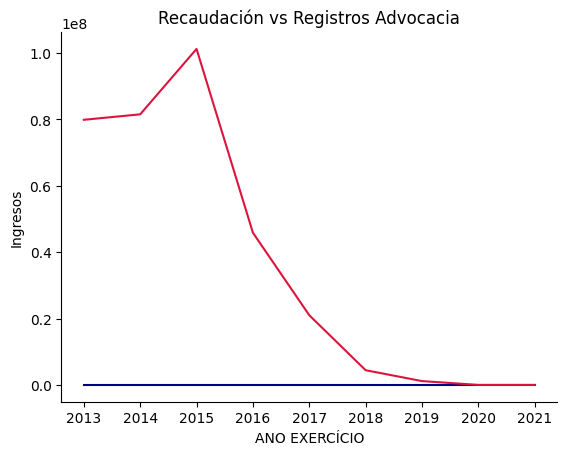

In [14]:
fs.evolucion_temporal(temporal_advocacia, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

La Procuraduría General de la Unión ha recaudado un total de 334,962,977.49 $ entre 2013 y 2021, representando esto un 8,99 % de lo previsto a recaudar. Asimismo nos encontramos que ha registrado un total de 0 dólares de lo recaudado finalmente. El año en el que más ha recaudado ha sido 2015, y a partir de ese año la recaudación se ve reducida de forma anual.

### *Contraloría General de la Unión (Controladoria-Geral da União)*

In [8]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Controladoria-Geral da União")

Los órganos de los que se compone el Controladoria-Geral da União son: ['Controladoria-Geral da União'
 'Controladoria-Geral da União - Unidades com vínculo direto']
Las unidades gestoras que componen los órganos del Controladoria-Geral da União son: ['DIRETORIA DE GESTAO INTERNA/SE/CGU' 'DIRETORIA DE GESTAO INTERNA(CGU)']
Los ingresos entre 2013 y 2025 del Controladoria-Geral da União son: 



,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
NOME ÓRGÃO SUPERIOR,,,,,
Controladoria-Geral da União,"740,692,856.00",0.00,"7,555,037.45",1.02,"7,555,037.45"


In [9]:
temporal_controladoria = fs.info_ministerio(datos_brasil, "Controladoria-Geral da União")
temporal_controladoria

,VALOR LANÇADO,VALOR REALIZADO
ANO EXERCÍCIO,,
2013,0.00,"1,250,774.97"
2014,0.00,"266,947.18"
2015,0.00,"884,447.32"
2016,0.00,"1,277,912.59"
2017,0.00,"3,863,278.55"
2018,0.00,"11,676.84"
2020,0.00,0.00
2021,0.00,0.00


In [10]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "Controladoria-Geral da União")

,,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO
NOME ÓRGÃO,NOME UNIDADE GESTORA,,,
Controladoria-Geral da União,DIRETORIA DE GESTAO INTERNA/SE/CGU,"19,176,752.00",0.00,"4,346,194.92"
Controladoria-Geral da União - Unidades com vínculo direto,DIRETORIA DE GESTAO INTERNA(CGU),"721,516,104.00",0.00,"3,208,842.53"


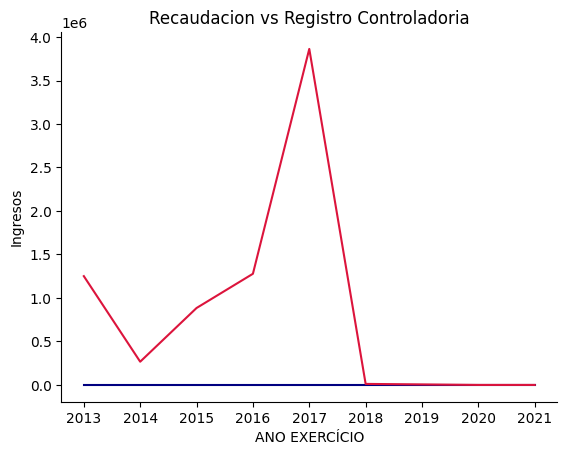

In [11]:
fs.evolucion_temporal(temporal_controladoria, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

La Contraloría General de la Unión ha recaudado un total de 740.692.856 $ entre 2013 y 2021, representando esto un 1,02 % de lo previsto a recaudar. Asimismo nos encontramos que ha registrado un total de 0 dólares de lo recaudado finalmente. El año en el que más ha recaudado ha sido 2017, año a partir del cual los ingresos de este ministerio se ven completamente reducidos a cero.

### *Ministerio de Agricultura, Ganadería y Abastecimiento (Ministério da Agricultura, Pecuária e Abastec)* 🐤

In [11]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Ministério da Agricultura, Pecuária e Abastec")

Los órganos de los que se compone el Ministério da Agricultura, Pecuária e Abastec son: ['Empresa Brasileira de Pesquisa Agropecuária'
 'Ministério da Agricultura, Pecuária e Abastecimento - Unidades com vínculo direto'
 'Companhia Nacional de Abastecimento' 'Serviço Florestal Brasileiro'
 'Instituto Nacional de Colonização e Reforma Agrária'
 'Fundo de Defesa da Economia Cafeeira'
 'Fundo de Terras e da Reforma Agrária'
 'Secretaria Especial de Agricultura Familiar e do Desenvolvimento Agrário']
Las unidades gestoras que componen los órganos del Ministério da Agricultura, Pecuária e Abastec son: ['EMBRAPA-SETORIAL' 'COORD.-GERAL DE ORCAMENTO E FINANCAS-MAPA'
 'COMPANHIA NACIONAL DE ABASTECIMENTO'
 'SETORIAL PROG.ORCAMENTARIA E FINANCEIRA-SFB'
 'DPTO. DE ADMINISTRACAO FINANCEIRA-DAF - INCRA'
 'FUNDO DE DEFESA DA ECON.CAFEEIRA/FUNCAFE/SPA' 'CREDITO FUNDIARIO'
 'SEC.ESPEC.DE AGRIC.FAMIL.E DO DESENV.AGRARIO'
 'SECRETARIA ESPECIAL DE AQUICULTURA E PESCA/PR'
 'COORDENACAO-GERAL DO FUNDO DE 

,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
NOME ÓRGÃO SUPERIOR,,,,,
"Ministério da Agricultura, Pecuária e Abastec","87,492,532,893.00",0.00,"56,433,953,381.26",64.50,"56,433,953,381.26"


In [12]:
# Vemos la información temporal sobre el ministerio
temporal_agricultura = fs.info_ministerio(datos_brasil, "Ministério da Agricultura, Pecuária e Abastec")
temporal_agricultura

,VALOR LANÇADO,VALOR REALIZADO
ANO EXERCÍCIO,,
2013,0.00,"6,302,036,557.43"
2014,0.00,"4,800,117,367.13"
2015,0.00,"6,200,536,186.78"
2016,0.00,"6,245,684,227.04"
2017,0.00,"6,981,982,293.88"
2018,0.00,"6,059,488,240.06"
2019,0.00,"6,871,989,141.97"
2020,0.00,"6,955,897,667.06"
2021,0.00,"6,016,221,699.91"


In [15]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "Ministério da Agricultura, Pecuária e Abastec")

VALOR PREVISTO ATUALIZADO  \
NOME ÓRGÃO                                         NOME UNIDADE GESTORA                                                       
Companhia Nacional de Abastecimento                COMPANHIA NACIONAL DE ABASTECIMENTO                    16,181,320,395.00   
Empresa Brasileira de Pesquisa Agropecuária        EMBRAPA-SETORIAL                                        4,543,365,404.00   
Fundo de Defesa da Economia Cafeeira               FUNDO DE DEFESA DA ECON.CAFEEIRA/FUNCAFE/SPA           44,763,486,199.00   
Fundo de Terras e da Reforma Agrária               COORDENACAO-GERAL DO FUNDO DE TERRAS                                0.00   
                                                   CREDITO FUNDIARIO                                         795,133,061.00   
Instituto Nacional de Colonização e Reforma Agr... DPTO. DE ADMINISTRACAO FINANCEIRA-DAF - INCRA          14,644,570,444.00   
Ministério da Agricultura, Pecuária e Abastecim... COORD.-GERAL DE ORCAMENTO E FINANCAS-MAPA               6,059,471,621.00   
                                                   SECRETARIA ESPECIAL DE AQUICULTURA E PESCA/PR               5,327,629.00   
Secretaria Especial de Agricultura Familiar e d... SEC.ESPEC.DE AGRIC.FAMIL.E DO DESENV.AGRARIO               98,336,469.00   
Serviço Florestal Brasileiro                       SETORIAL PROG.ORCAMENTARIA E FINANCEIRA-SFB               401,521,671.00   

                                                                                                  VALOR LANÇADO  \
NOME ÓRGÃO                                         NOME UNIDADE GESTORA                                           
Companhia Nacional de Abastecimento                COMPANHIA NACIONAL DE ABASTECIMENTO                     0.00   
Empresa Brasileira de Pesquisa Agropecuária        EMBRAPA-SETORIAL                                        0.00   
Fundo de Defesa da Economia Cafeeira               FUNDO DE DEFESA DA ECON.CAFEEIRA/FUNCAFE/SPA            0.00   
Fundo de Terras e da Reforma Agrária               COORDENACAO-GERAL DO FUNDO DE TERRAS                    0.00   
                                                   CREDITO FUNDIARIO                                       0.00   
Instituto Nacional de Colonização e Reforma Agr... DPTO. DE ADMINISTRACAO FINANCEIRA-DAF - INCRA           0.00   
Ministério da Agricultura, Pecuária e Abastecim... COORD.-GERAL DE ORCAMENTO E FINANCAS-MAPA               0.00   
                                                   SECRETARIA ESPECIAL DE AQUICULTURA E PESCA/PR           0.00   
Secretaria Especial de Agricultura Familiar e d... SEC.ESPEC.DE AGRIC.FAMIL.E DO DESENV.AGRARIO            0.00   
Serviço Florestal Brasileiro                       SETORIAL PROG.ORCAMENTARIA E FINANCEIRA-SFB             0.00   

                                                                                                   VALOR REALIZADO  
NOME ÓRGÃO                                         NOME UNIDADE GESTORA                                             
Companhia Nacional de Abastecimento                COMPANHIA NACIONAL DE ABASTECIMENTO            1,157,437,895.80  
Empresa Brasileira de Pesquisa Agropecuária        EMBRAPA-SETORIAL                                 410,143,266.07  
Fundo de Defesa da Economia Cafeeira               FUNDO DE DEFESA DA ECON.CAFEEIRA/FUNCAFE/SPA  35,393,834,816.34  
Fundo de Terras e da Reforma Agrária               COORDENACAO-GERAL DO FUNDO DE TERRAS              89,215,763.39  
                                                   CREDITO FUNDIARIO                              1,614,404,425.39  
Instituto Nacional de Colonização e Reforma Agr... DPTO. DE ADMINISTRACAO FINANCEIRA-DAF - INCRA 15,239,509,246.71  
Ministério da Agricultura, Pecuária e Abastecim... COORD.-GERAL DE ORCAMENTO E FINANCAS-MAPA      2,343,661,823.46  
                                                   SECRETARIA ESPECIAL DE AQUICULTURA E PESCA/PR      3,651,982.69  
Secretaria Especial de

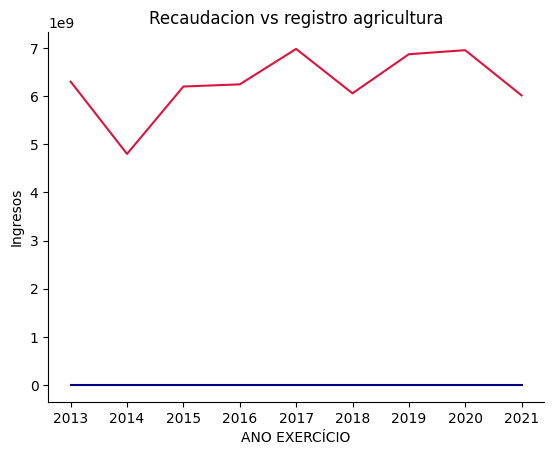

In [14]:
fs.evolucion_temporal(temporal_agricultura, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de los Derechos Humanos y la Ciudadanía (Ministério dos Direitos Humanos e da Cidadania)* 👪

In [ ]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Vemos la información temporal sobre el ministerio
temporal_ = fs.info_ministerio(datos_brasil, "")
temporal_

In [ ]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "")

In [ ]:
fs.evolucion_temporal(temporal_, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de Ciencia, Tecnología e Innovación* 🔬

In [ ]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Vemos la información temporal sobre el ministerio
temporal_ = fs.info_ministerio(datos_brasil, "")
temporal_

In [ ]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de Defensa (Ministério da Defesa)* 🚓


In [ ]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Vemos la información temporal sobre el ministerio
temporal_ = fs.info_ministerio(datos_brasil, "")
temporal_

In [ ]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de Economía/ Hacienda (Ministério da Economia/Fazenda)* 💰

In [ ]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Vemos la información temporal sobre el ministerio
temporal_ = fs.info_ministerio(datos_brasil, "")
temporal_

In [ ]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de Educación (Ministério da Educação)* 📚

In [ ]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Vemos la información temporal sobre el ministerio
temporal_ = fs.info_ministerio(datos_brasil, "")
temporal_

In [ ]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de Infraestructuras/Transportes (Ministério da Infraestrutura/dos Transportes)* 🚊

In [ ]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Vemos la información temporal sobre el ministerio
temporal_ = fs.info_ministerio(datos_brasil, "")
temporal_

In [ ]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de Justicia y Seguridad Pública (Ministério da Justiça e Segurança Pública)* 👮

In [ ]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Vemos la información temporal sobre el ministerio
temporal_ = fs.info_ministerio(datos_brasil, "")
temporal_

In [ ]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de la Mujer (Ministério da Mulher, Família e Direitos Huma)* 🙆‍♀️

In [ ]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Vemos la información temporal sobre el ministerio
temporal_ = fs.info_ministerio(datos_brasil, "")
temporal_

In [ ]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de Pesca y Acuicultura (Ministério da Pesca e Aquicultura)* 🐙

In [ ]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Vemos la información temporal sobre el ministerio
temporal_ = fs.info_ministerio(datos_brasil, "")
temporal_

In [ ]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de Bienestar Social (Ministério da Previdência Social)* 🙌

In [ ]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Vemos la información temporal sobre el ministerio
temporal_ = fs.info_ministerio(datos_brasil, "")
temporal_

In [ ]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de Sanidad (Ministério da Saúde)* 🏥

In [ ]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Vemos la información temporal sobre el ministerio
temporal_ = fs.info_ministerio(datos_brasil, "")
temporal_

In [ ]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de Comunicaciones (Ministério das Comunicações)* 📢

In [ ]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Vemos la información temporal sobre el ministerio
temporal_ = fs.info_ministerio(datos_brasil, "")
temporal_

In [ ]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de Igualdad Racial (Igualdade Racial)*  👫

In [ ]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Vemos la información temporal sobre el ministerio
temporal_ = fs.info_ministerio(datos_brasil, "")
temporal_

In [ ]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de Asuntos Exteriores (Ministério das Relações Exteriores)* 🌎

In [ ]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Vemos la información temporal sobre el ministerio
temporal_ = fs.info_ministerio(datos_brasil, "")
temporal_

In [ ]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de Minas y Energía (Ministério de Minas e Energia)* 🔋

In [ ]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Vemos la información temporal sobre el ministerio
temporal_ = fs.info_ministerio(datos_brasil, "")
temporal_

In [ ]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de Desarrollo Agrario (Ministério do Desenvolvimento Agrário)* 🌾

In [ ]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Vemos la información temporal sobre el ministerio
temporal_ = fs.info_ministerio(datos_brasil, "")
temporal_

In [ ]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de Integración y Desarrollo Regional (Ministério da Integração Desenvolvimento Regional)*

In [ ]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Vemos la información temporal sobre el ministerio
temporal_ = fs.info_ministerio(datos_brasil, "")
temporal_

In [ ]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de Deportes (Ministério do Esporte)* 🏃

In [ ]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Vemos la información temporal sobre el ministerio
temporal_ = fs.info_ministerio(datos_brasil, "")
temporal_

In [ ]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de Medio Ambiente y Cambio Climático (Ministério do Meio Ambiente e Mudança do Clima)*

In [ ]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Vemos la información temporal sobre el ministerio
temporal_ = fs.info_ministerio(datos_brasil, "")
temporal_

In [ ]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de Trabajo y Empleo (Ministério do Trabalho e Emprego)*

In [ ]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Vemos la información temporal sobre el ministerio
temporal_ = fs.info_ministerio(datos_brasil, "")
temporal_

In [ ]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de Turismo (Ministério do Turismo)*

In [ ]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Vemos la información temporal sobre el ministerio
temporal_ = fs.info_ministerio(datos_brasil, "")
temporal_

In [ ]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Presidencia de la República (Presidência da República)*

In [ ]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Vemos la información temporal sobre el ministerio
temporal_ = fs.info_ministerio(datos_brasil, "")
temporal_

In [ ]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "")

In [ ]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])